In [106]:
import pandas as pd
import matplotlib.pyplot as plt


In [107]:
data = pd.read_csv("C:/Users/christine.karimi_was/Desktop/projects/ThikaSKU1.csv")

In [108]:
data.columns

Index(['product_class', 'product_description', 'gmv_usd_2023-31',
       'gmv_usd_2023-32', 'gmv_usd_2023-33', 'gmv_usd_2023-34',
       'gmv_usd_2023-35', 'packs_sold_2023-31', 'packs_sold_2023-32',
       'packs_sold_2023-33', 'packs_sold_2023-34', 'packs_sold_2023-35',
       'sales_forecast_next_week', 'Available SOH', 'planned_gmv',
       'Proc Check', 'Stock Status', 'AUG DF', 'AUG GMV'],
      dtype='object')

In [109]:
# Replace NaN values with zero
data = data.fillna(0)

In [110]:
grouped_data = data.groupby('product_class')

grouped_data.head(5)


,product_class,product_description,gmv_usd_2023-31,gmv_usd_2023-32,gmv_usd_2023-33,gmv_usd_2023-34,gmv_usd_2023-35,packs_sold_2023-31,packs_sold_2023-32,packs_sold_2023-33,packs_sold_2023-34,packs_sold_2023-35,sales_forecast_next_week,Available SOH,planned_gmv,Proc Check,Stock Status,AUG DF,AUG GMV
0,Baking Powder,Chapa Mandashi Baking Powder 100gx12,145.390922,83.109291,124.752766,114.362624,82.234255,56,32,48,44,32,60.166667,1097.0,154.617532,1036.833333,Sufficient,1000.0,2758.0
1,Baking Powder,Menendazi Baking Powder 100g x12,0.000000,18.439716,34.574468,29.964539,6.914894,0,8,15,13,3,12.000000,263.0,27.659574,251.000000,Sufficient,0.0,0.0
2,Biscuits & Cakes,Nuvita Wafers Assorted 9g x72,4.964539,19.858156,0.000000,2.482270,19.858156,2,8,0,1,8,0.000000,21.0,0.000000,21.000000,Sufficient,25.0,66.0
3,Carbonated Soft Drinks,Smart pick Energy drink 300mlX12,5.617021,14.042553,11.234043,19.397163,8.425532,2,5,4,7,3,4.666667,223.0,13.106383,218.333333,Sufficient,251.0,798.0
4,Carbonated Soft Drinks,Steam Energy Drink 400ml x 12,0.000000,23.829787,11.914894,0.000000,11.914894,0,6,3,0,3,0.000000,0.0,0.000000,0.000000,Sufficient,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Tea,Eden Tea Tangawizi sachets 50g x10,20.673759,9.397163,18.794326,36.794326,10.709220,11,5,10,20,6,11.666667,121.0,20.823483,109.333333,Sufficient,0.0,0.0
180,Tea,Ketepa Tea Leaves 100g x10,90.141844,113.404255,75.602837,29.078014,0.000000,31,39,26,10,0,24.833333,0.0,0.000000,-24.833333,Insufficient,0.0,0.0
183,Water,Planet Water 500ml x 24,13.652482,65.531915,54.609929,0.000000,0.000000,5,24,20,0,0,14.666667,0.0,0.000000,-14.666667,Insufficient,0.0,0.0
184,Water,Safi Water 1L x 12,0.000000,3.404255,0.000000,3.404255,0.000000,0,1,0,1,0,0.000000,0.0,0.000000,0.000000,Sufficient,0.0,0.0


In [111]:
# Calculate total packs sold and total GMV for all weeks
data['total_packs_sold'] = data[['packs_sold_2023-31', 'packs_sold_2023-32', 'packs_sold_2023-33', 'packs_sold_2023-34', 'packs_sold_2023-35']].sum(axis=1)
data['total_gmv'] = data[['gmv_usd_2023-31', 'gmv_usd_2023-32', 'gmv_usd_2023-33', 'gmv_usd_2023-34', 'gmv_usd_2023-35']].sum(axis=1)

# Calculate the performance metrics
data['packs_sold_performance'] = (data['total_packs_sold'] / data['AUG DF']) * 100
data['gmv_performance'] = (data['total_gmv'] / data['planned_gmv']) * 100


In [112]:
data.head(50)

,product_class,product_description,gmv_usd_2023-31,gmv_usd_2023-32,gmv_usd_2023-33,gmv_usd_2023-34,gmv_usd_2023-35,packs_sold_2023-31,packs_sold_2023-32,packs_sold_2023-33,...,Available SOH,planned_gmv,Proc Check,Stock Status,AUG DF,AUG GMV,total_packs_sold,total_gmv,packs_sold_performance,gmv_performance
0,Baking Powder,Chapa Mandashi Baking Powder 100gx12,145.390922,83.109291,124.752766,114.362624,82.234255,56,32,48,...,1097.0,154.617532,1036.833333,Sufficient,1000.0,2758.0,212,549.849858,21.200000,3.556193e+02
1,Baking Powder,Menendazi Baking Powder 100g x12,0.000000,18.439716,34.574468,29.964539,6.914894,0,8,15,...,263.0,27.659574,251.000000,Sufficient,0.0,0.0,39,89.893617,inf,3.250000e+02
2,Biscuits & Cakes,Nuvita Wafers Assorted 9g x72,4.964539,19.858156,0.000000,2.482270,19.858156,2,8,0,...,21.0,0.000000,21.000000,Sufficient,25.0,66.0,19,47.163121,76.000000,inf
3,Carbonated Soft Drinks,Smart pick Energy drink 300mlX12,5.617021,14.042553,11.234043,19.397163,8.425532,2,5,4,...,223.0,13.106383,218.333333,Sufficient,251.0,798.0,21,58.716312,8.366534,4.479978e+02
4,Carbonated Soft Drinks,Steam Energy Drink 400ml x 12,0.000000,23.829787,11.914894,0.000000,11.914894,0,6,3,...,0.0,0.000000,0.000000,Sufficient,0.0,0.0,12,47.659574,inf,inf
5,Cereals,Nestle Cerelac Wheat Infant 25g x 12,11.241135,2.248227,0.000000,0.000000,0.000000,5,1,0,...,0.0,0.000000,-11.166667,Insufficient,0.0,0.0,6,13.489362,inf,inf
6,Cereals,Nestle Cerelac Wheat Infant 50g x 12,0.000000,9.035461,0.000000,0.000000,0.000000,0,2,0,...,0.0,0.000000,0.000000,Sufficient,0.0,0.0,2,9.035461,inf,inf
7,Coffee,MacCoffee Kenyan Kahawa 25g,3.886525,0.000000,6.801418,1.943262,5.829787,4,0,7,...,144.0,1.781324,142.166667,Sufficient,0.0,0.0,19,18.460993,inf,1.036364e+03
8,Condiments & seasonings,Kensalt Table Salt 1Kg x20,19.007092,38.014184,57.021277,33.262411,23.758865,4,8,12,...,23.0,0.000000,23.000000,Sufficient,400.0,2021.0,36,171.063830,9.000000,inf
9,Condiments & seasonings,Kensalt Table Salt 200g,18.333333,112.936170,54.829787,52.936170,1.666667,11,68,33,...,0.0,73.888889,-44.333333,Insufficient,500.0,893.0,145,240.702128,29.000000,3.257623e+02


# Least performing products

In [113]:
import pandas as pd


# Calculate the benchmarked GMV performance for each product
data['GMV_Performance'] = (data[['gmv_usd_2023-31', 'gmv_usd_2023-32', 'gmv_usd_2023-33', 'gmv_usd_2023-34', 'gmv_usd_2023-35']].sum(axis=1) / data['planned_gmv']) * 100

# Filter products with GMV_Performance < 50
least_performing_products = data[data['GMV_Performance'] < 60]

# Calculate the sum of all packs sold for each product
least_performing_products['Total_Packs_Sold'] = least_performing_products[['packs_sold_2023-31', 'packs_sold_2023-32', 'packs_sold_2023-33', 'packs_sold_2023-34', 'packs_sold_2023-35']].sum(axis=1)

# Calculate the sum of GMV for all weeks for each product
least_performing_products['Total_GMV'] = least_performing_products[['gmv_usd_2023-31', 'gmv_usd_2023-32', 'gmv_usd_2023-33', 'gmv_usd_2023-34', 'gmv_usd_2023-35']].sum(axis=1)

# Select columns for display
selected_columns = ['product_description', 'Total_Packs_Sold', 'planned_gmv', 'Total_GMV', 'GMV_Performance']

# Sort the least performing products by GMV_Performance in ascending order
least_performing_products = least_performing_products.sort_values(by='GMV_Performance', ascending=True)

# Display the 15 least performing products
least_performing_products.head(15)[selected_columns]


C:\Users\christine.karimi_was\AppData\Local\Temp\ipykernel_15200\3881952968.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  least_performing_products['Total_Packs_Sold'] = least_performing_products[['packs_sold_2023-31', 'packs_sold_2023-32', 'packs_sold_2023-33', 'packs_sold_2023-34', 'packs_sold_2023-35']].sum(axis=1)
C:\Users\christine.karimi_was\AppData\Local\Temp\ipykernel_15200\3881952968.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  least_performing_products['Total_GMV'] = least_performin

,product_description,Total_Packs_Sold,planned_gmv,Total_GMV,GMV_Performance
98,Downy Fabric Care Blue Valley 20ml x 12,1,101.290780,1.368794,1.351351
13,Royco Mchuzi Mix Chicken 8gx10,3,7.021277,1.170213,16.666667
70,Pembe Home Baking Flour 2Kg x 12,8,498.676123,122.765957,24.618375
151,Flamingo Biryani Rice 25Kg,95,4701.713949,1779.780142,37.853858
23,Alpa Cooking Fat 10Kg,1,32.446809,12.978723,40.000000
112,Omo Washing Powder 14 Days Fresh 80g x12,49,268.053192,115.746809,43.180537
76,Shibe Maize Maize 2kg x12,53,1234.196218,740.000000,59.958051


# Top performing 

In [114]:
import pandas as pd
# Calculate the benchmarked GMV performance for each product
data['GMV_Performance'] = (data[['gmv_usd_2023-31', 'gmv_usd_2023-32', 'gmv_usd_2023-33', 'gmv_usd_2023-34', 'gmv_usd_2023-35']].sum(axis=1) / data['planned_gmv']) * 100

# Filter products with GMV_Performance >= 75 and non-zero planned_gmv
performing_products = data[(data['GMV_Performance'] >= 75) & (data['planned_gmv'] > 0)]

# Calculate the sum of all packs sold for each product
performing_products['Total_Packs_Sold'] = performing_products[['packs_sold_2023-31', 'packs_sold_2023-32', 'packs_sold_2023-33', 'packs_sold_2023-34', 'packs_sold_2023-35']].sum(axis=1)

# Calculate the sum of GMV for all weeks for each product
performing_products['Total_GMV'] = performing_products[['gmv_usd_2023-31', 'gmv_usd_2023-32', 'gmv_usd_2023-33', 'gmv_usd_2023-34', 'gmv_usd_2023-35']].sum(axis=1)

# Select columns for display
selected_columns = ['product_description', 'Total_Packs_Sold', 'planned_gmv', 'Total_GMV', 'GMV_Performance']

# Sort the performing products by GMV_Performance in descending order
performing_products = performing_products.sort_values(by='GMV_Performance', ascending=False)

# Display the entire DataFrame of performing products
performing_products[selected_columns]


C:\Users\christine.karimi_was\AppData\Local\Temp\ipykernel_15200\2994499510.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performing_products['Total_Packs_Sold'] = performing_products[['packs_sold_2023-31', 'packs_sold_2023-32', 'packs_sold_2023-33', 'packs_sold_2023-34', 'packs_sold_2023-35']].sum(axis=1)
C:\Users\christine.karimi_was\AppData\Local\Temp\ipykernel_15200\2994499510.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performing_products['Total_GMV'] = performing_products[['gmv_usd_2023

,product_description,Total_Packs_Sold,planned_gmv,Total_GMV,GMV_Performance
43,Ajab Maize Meal 2Kg x 12,34,5.130024,544.326241,10610.599089
130,White Wash M Purpose Soap Blue 175g x12,13,1.241135,32.269504,2599.999998
7,MacCoffee Kenyan Kahawa 25g,19,1.781324,18.460993,1036.363636
170,Imported Brown Sugar 50kg,110,791.725768,7707.092199,973.454763
33,Salsa Cooking Fat 5kg,6,4.137116,37.234043,900.000000
...,...,...,...,...,...
60,Mama Maize Meal 2Kg x12,94,1276.004728,1416.879433,111.040296
77,Shujaa Maize Meal 1Kg x24,80,1126.040189,1231.205674,109.339408
62,Mfalme Maize Meal 1Kg x24,51,852.955083,821.560284,96.319290
174,Ndhiwa Sugar 2Kg x10,39,1201.891253,1152.418440,95.883753


# Trend for the 3 weeks in terms of product class

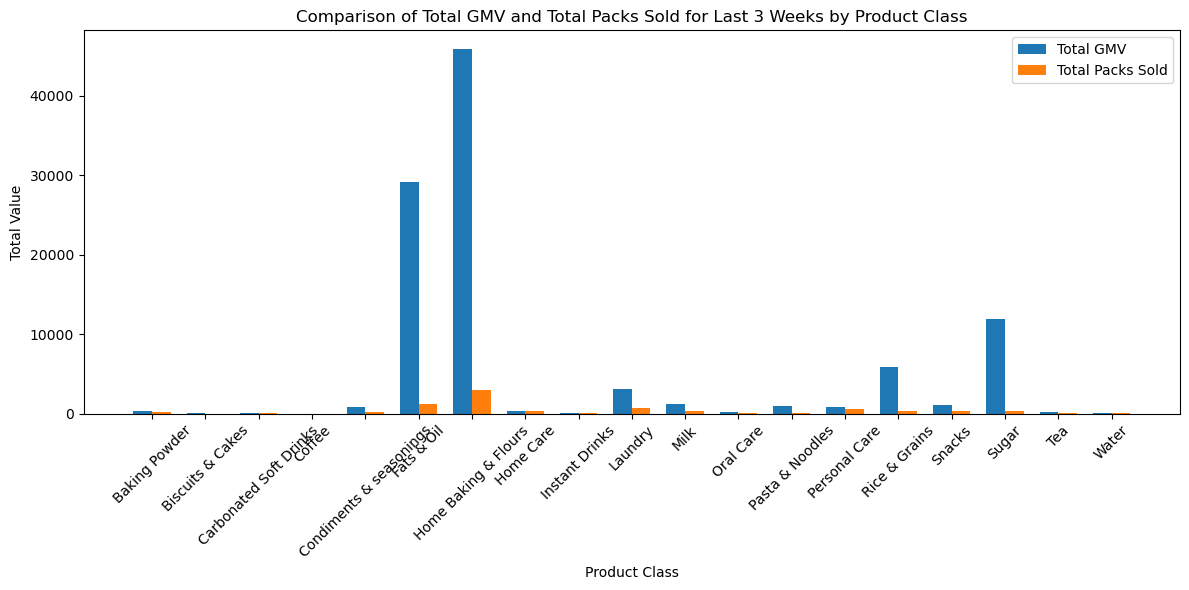

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Select columns for analysis (GMV and packs sold for the last 3 weeks)
selected_columns = ['gmv_usd_2023-33', 'gmv_usd_2023-34', 'gmv_usd_2023-35', 'packs_sold_2023-33', 'packs_sold_2023-34', 'packs_sold_2023-35']

# Calculate the total GMV and total packs sold for each product for the last 3 weeks
data['Total_GMV'] = data[selected_columns[:3]].sum(axis=1)
data['Total_Packs_Sold'] = data[selected_columns[3:]].sum(axis=1)

# Filter products with non-zero total GMV and total packs sold
filtered_data = data[(data['Total_GMV'] > 0) & (data['Total_Packs_Sold'] > 0)]

# Group the filtered data by product class
grouped_data = filtered_data.groupby('product_class')

# Calculate the total GMV and total packs sold for each product class
total_gmv = grouped_data['Total_GMV'].sum()
total_packs_sold = grouped_data['Total_Packs_Sold'].sum()

# Create a grouped bar chart to compare total GMV and total packs sold
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(total_gmv.index))

plt.bar(index, total_gmv, bar_width, label='Total GMV')
plt.bar([i + bar_width for i in index], total_packs_sold, bar_width, label='Total Packs Sold')

plt.xlabel('Product Class')
plt.ylabel('Total Value')
plt.title('Comparison of Total GMV and Total Packs Sold for Last 3 Weeks by Product Class')
plt.xticks([i + bar_width/2 for i in index], total_gmv.index, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


In [116]:
import pandas as pd
import matplotlib.pyplot as plt
# Select columns for analysis (GMV and packs sold for the last 3 weeks)
selected_columns = ['gmv_usd_2023-33', 'gmv_usd_2023-34', 'gmv_usd_2023-35', 'packs_sold_2023-33', 'packs_sold_2023-34', 'packs_sold_2023-35']

# Calculate the total GMV and total packs sold for each product for the last 3 weeks
data['Total_GMV'] = data[selected_columns[:3]].sum(axis=1)
data['Total_Packs_Sold'] = data[selected_columns[3:]].sum(axis=1)

# Filter products with non-zero total GMV and total packs sold
filtered_data = data[(data['Total_GMV'] > 0) & (data['Total_Packs_Sold'] > 0)]

# Group the filtered data by product class
grouped_data = filtered_data.groupby('product_class')

# Calculate the total GMV and total packs sold for each product class
total_gmv = grouped_data['Total_GMV'].sum()
total_packs_sold = grouped_data['Total_Packs_Sold'].sum()

# Create a DataFrame to display the numbers in tabular form
table_data = pd.DataFrame({'Product Class': total_gmv.index, 'Total GMV': total_gmv.values, 'Total Packs Sold': total_packs_sold.values})

# Display the table
table_data


,Product Class,Total GMV,Total Packs Sold
0,Baking Powder,392.803546,155
1,Biscuits & Cakes,22.340426,9
2,Carbonated Soft Drinks,62.886525,20
3,Coffee,14.574468,15
4,Condiments & seasonings,835.624114,260
5,Fats & Oil,29154.234045,1164
6,Home Baking & Flours,45919.744684,3030
7,Home Care,339.007092,296
8,Instant Drinks,32.290780,39
9,Laundry,3077.809362,761


# Current week  peformance

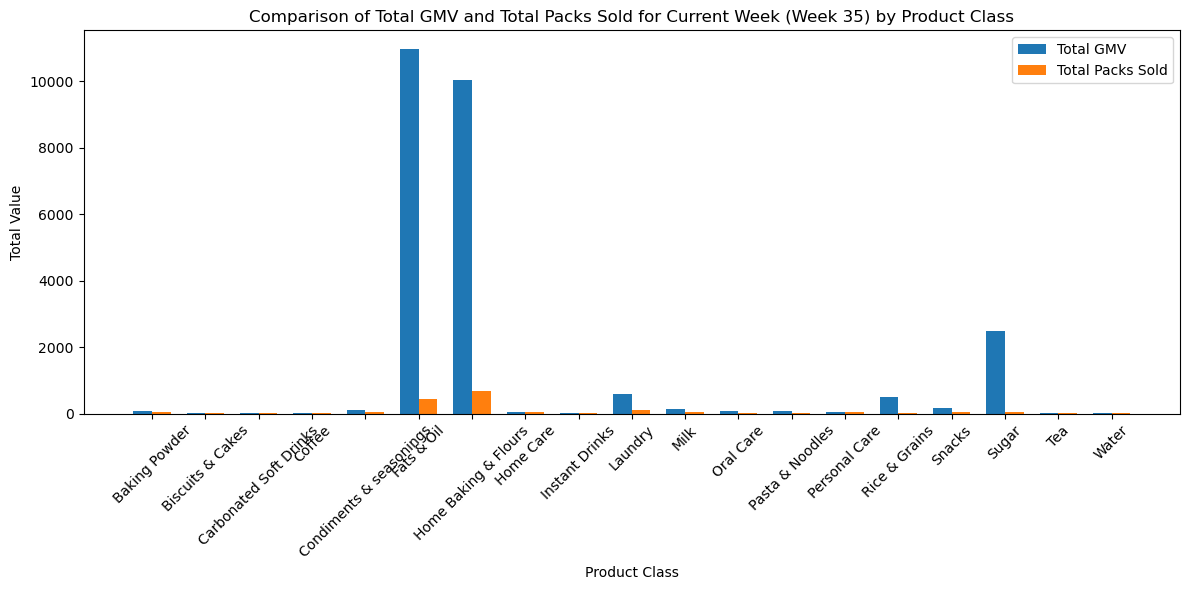

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
# Select columns for analysis (GMV and packs sold for the current week)
selected_columns = ['gmv_usd_2023-35', 'packs_sold_2023-35']

# Calculate the total GMV and total packs sold for each product for the current week
data['Total_GMV'] = data[selected_columns[0]]
data['Total_Packs_Sold'] = data[selected_columns[1]]

# Filter products with non-zero total GMV and total packs sold
filtered_data = data[(data['Total_GMV'] > 0) & (data['Total_Packs_Sold'] > 0)]

# Group the filtered data by product class
grouped_data = filtered_data.groupby('product_class')

# Calculate the total GMV and total packs sold for each product class
total_gmv = grouped_data['Total_GMV'].sum()
total_packs_sold = grouped_data['Total_Packs_Sold'].sum()

# Create a grouped bar chart to compare total GMV and total packs sold for the current week
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(total_gmv.index))

plt.bar(index, total_gmv, bar_width, label='Total GMV')
plt.bar([i + bar_width for i in index], total_packs_sold, bar_width, label='Total Packs Sold')

plt.xlabel('Product Class')
plt.ylabel('Total Value')
plt.title('Comparison of Total GMV and Total Packs Sold for Current Week (Week 35) by Product Class')
plt.xticks([i + bar_width/2 for i in index], total_gmv.index, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


In [118]:
import pandas as pd

# Select columns for analysis (GMV and packs sold for the current week)
selected_columns = ['product_class', 'gmv_usd_2023-35', 'packs_sold_2023-35']

# Filter products with non-zero total GMV and total packs sold for the current week
filtered_data = data[(data['gmv_usd_2023-35'] > 0) & (data['packs_sold_2023-35'] > 0)]

# Group the filtered data by product class
grouped_data = filtered_data.groupby('product_class')

# Calculate the total GMV and total packs sold for each product class for the current week
total_gmv = grouped_data['gmv_usd_2023-35'].sum()
total_packs_sold = grouped_data['packs_sold_2023-35'].sum()

# Create a summary DataFrame
summary_data = pd.DataFrame({
    'Product Class': total_gmv.index,
    'Total GMV (Week 35)': total_gmv.values,
    'Total Packs Sold (Week 35)': total_packs_sold.values
})

# Display the summary table
summary_data


,Product Class,Total GMV (Week 35),Total Packs Sold (Week 35)
0,Baking Powder,89.149149,35
1,Biscuits & Cakes,19.858156,8
2,Carbonated Soft Drinks,20.340426,6
3,Coffee,5.829787,6
4,Condiments & seasonings,113.085106,39
5,Fats & Oil,10980.106384,436
6,Home Baking & Flours,10035.673760,682
7,Home Care,43.773050,39
8,Instant Drinks,7.085106,9
9,Laundry,575.831915,116


In [119]:
import pandas as pd

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Define the weeks columns for GMV and Packs Sold
weeks_columns_gmv = ['gmv_usd_2023-31', 'gmv_usd_2023-32', 'gmv_usd_2023-33', 'gmv_usd_2023-34', 'gmv_usd_2023-35']
weeks_columns_packs = ['packs_sold_2023-31', 'packs_sold_2023-32', 'packs_sold_2023-33', 'packs_sold_2023-34', 'packs_sold_2023-35']

# Calculate the trend for each product in terms of GMV and Packs Sold
for week in range(1, len(weeks_columns_gmv)):
    df[f'GMV_Trend_Week_{week}'] = df[weeks_columns_gmv[week]] - df[weeks_columns_gmv[week - 1]]
    df[f'Packs_Sold_Trend_Week_{week}'] = df[weeks_columns_packs[week]] - df[weeks_columns_packs[week - 1]]

# Display the DataFrame with GMV and Packs Sold Trends for the previous 3 weeks
columns_to_display = ['product_description'] + [f'GMV_Trend_Week_{week}' for week in range(1, len(weeks_columns_gmv))] + [f'Packs_Sold_Trend_Week_{week}' for week in range(1, len(weeks_columns_packs))]
df[columns_to_display]


,product_description,GMV_Trend_Week_1,GMV_Trend_Week_2,GMV_Trend_Week_3,GMV_Trend_Week_4,Packs_Sold_Trend_Week_1,Packs_Sold_Trend_Week_2,Packs_Sold_Trend_Week_3,Packs_Sold_Trend_Week_4
0,Chapa Mandashi Baking Powder 100gx12,-62.281631,41.643475,-10.390142,-32.128369,-24,16,-4,-12
1,Menendazi Baking Powder 100g x12,18.439716,16.134752,-4.609929,-23.049645,8,7,-2,-10
2,Nuvita Wafers Assorted 9g x72,14.893617,-19.858156,2.482270,17.375887,6,-8,1,7
3,Smart pick Energy drink 300mlX12,8.425532,-2.808511,8.163121,-10.971631,3,-1,3,-4
4,Steam Energy Drink 400ml x 12,23.829787,-11.914894,-11.914894,11.914894,6,-3,-3,3
...,...,...,...,...,...,...,...,...,...
181,Ketepa Tea Leaves 15g x 20,11.914894,-11.914894,0.000000,0.000000,16,-16,0,0
182,Ketepa Tea Leaves 50g x 10,4.468085,-4.468085,0.000000,1.489362,3,-3,0,1
183,Planet Water 500ml x 24,51.879433,-10.921986,-54.609929,0.000000,19,-4,-20,0
184,Safi Water 1L x 12,3.404255,-3.404255,3.404255,-3.404255,1,-1,1,-1


In [125]:
import pandas as pd

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Define the weeks columns for GMV and Packs Sold
weeks_columns_gmv = ['gmv_usd_2023-31', 'gmv_usd_2023-32', 'gmv_usd_2023-33', 'gmv_usd_2023-34', 'gmv_usd_2023-35']
weeks_columns_packs = ['packs_sold_2023-31', 'packs_sold_2023-32', 'packs_sold_2023-33', 'packs_sold_2023-34', 'packs_sold_2023-35']

# Calculate the weekly trend for each product in terms of GMV and Packs Sold
for week in range(1, len(weeks_columns_gmv)):
    df[f'GMV_Trend_Week_{week}'] = df[weeks_columns_gmv[week]] - df[weeks_columns_gmv[week - 1]]
    df[f'Packs_Sold_Trend_Week_{week}'] = df[weeks_columns_packs[week]] - df[weeks_columns_packs[week - 1]]

# Filter products with a consistently negative trend for both Packs Sold and GMV for more than twice
filtered_df = df[
    (df['GMV_Trend_Week_1'] < 0) &
    (df['GMV_Trend_Week_2'] < 0) &
    (df['GMV_Trend_Week_3'] < 0) &
    (df['Packs_Sold_Trend_Week_1'] < 0) &
    (df['Packs_Sold_Trend_Week_2'] < 0) &
    (df['Packs_Sold_Trend_Week_3'] < 0)
]

# Display the filtered DataFrame
x=filtered_df[['product_description', 'GMV_Trend_Week_1', 'GMV_Trend_Week_2', 'GMV_Trend_Week_3', 'Packs_Sold_Trend_Week_1', 'Packs_Sold_Trend_Week_2', 'Packs_Sold_Trend_Week_3']]
x.head()

,product_description,GMV_Trend_Week_1,GMV_Trend_Week_2,GMV_Trend_Week_3,Packs_Sold_Trend_Week_1,Packs_Sold_Trend_Week_2,Packs_Sold_Trend_Week_3
29,Oki Pure vegetable cooking oil 20L,-488.723404,-1378.723405,-28.297872,-17,-48,-1
62,Mfalme Maize Meal 1Kg x24,-86.808511,-20.709220,-127.092199,-5,-1,-8
63,Mfalme Maize Meal 2Kg x12,-115.177305,-53.191489,-78.439716,-7,-3,-5
75,Raha Premium Wheat Flour 2Kg x 12,-108.439716,-60.141844,-16.808511,-7,-4,-1
95,Ariel lavender washing powder 20g x12,-4.808511,-21.255319,-2.234043,-6,-29,-3


In [127]:
# Save the filtered DataFrame to a CSV file
x.to_csv('Thika downward  trend.csv.csv', index=False)


In [121]:
# Save DataFrame to a CSV file
df[columns_to_display].to_csv('Thika downward  trend.csv', index=False)  # Set index=False to exclude row numbers
